In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar100_root = '../cifar100'
ipc50 = np.loadtxt('./random_ipc_index/cifar100/ipc_50.txt', dtype=int)
ipc50

array([35640, 47103, 38839, ..., 48602, 17907, 37111])

In [3]:
cifar100_train = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 8
train_data_loader = DataLoader(cifar100_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc50))
test_data_loader = DataLoader(cifar100_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

625

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'AlexNet'
dataset = 'cifar100_ipc50'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = torchvision.models.alexnet(num_classes=100).to(device)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='sgd', lr=5e-3)

  0%|          | 0/625 [00:00<?, ?it/s]c:\Users\Andrew\envs\CS5340\lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Epoch 1: 100%|██████████| 625/625 [00:15<00:00, 39.39it/s, loss=4.64]


epoch: 1 done, loss: 0.05757325515151024
Acc: 0.0138
[0.005]


Epoch 2: 100%|██████████| 625/625 [00:18<00:00, 34.42it/s, loss=4.61]


epoch: 2 done, loss: 0.05749727040529251
Acc: 0.0139
[0.005]


Epoch 3: 100%|██████████| 625/625 [00:15<00:00, 39.26it/s, loss=4.66]


epoch: 3 done, loss: 0.057237278670072556
Acc: 0.0211
[0.005]


Epoch 4: 100%|██████████| 625/625 [00:13<00:00, 46.15it/s, loss=4.61]


epoch: 4 done, loss: 0.056367479264736176
Acc: 0.0247
[0.005]


Epoch 5: 100%|██████████| 625/625 [00:16<00:00, 37.73it/s, loss=3.67]


epoch: 5 done, loss: 0.05543023720383644
Acc: 0.0312
[0.005]


Epoch 6: 100%|██████████| 625/625 [00:17<00:00, 35.13it/s, loss=4.13]


epoch: 6 done, loss: 0.054479822516441345
Acc: 0.0375
[0.005]


Epoch 7: 100%|██████████| 625/625 [00:16<00:00, 38.17it/s, loss=4.55]


epoch: 7 done, loss: 0.053714606910943985
Acc: 0.0412
[0.005]


Epoch 8: 100%|██████████| 625/625 [00:13<00:00, 45.21it/s, loss=4.29]


epoch: 8 done, loss: 0.052681416273117065
Acc: 0.0469
[0.005]


Epoch 9: 100%|██████████| 625/625 [00:15<00:00, 40.16it/s, loss=3.96]


epoch: 9 done, loss: 0.05220460146665573
Acc: 0.0635
[0.005]


Epoch 10: 100%|██████████| 625/625 [00:17<00:00, 35.62it/s, loss=3.78]


epoch: 10 done, loss: 0.05151734873652458
Acc: 0.0614
[0.005]


Epoch 11: 100%|██████████| 625/625 [00:17<00:00, 35.39it/s, loss=3.61]


epoch: 11 done, loss: 0.0507369339466095
Acc: 0.0692
[0.005]


Epoch 12: 100%|██████████| 625/625 [00:14<00:00, 42.83it/s, loss=4.29]


epoch: 12 done, loss: 0.04990411922335625
Acc: 0.0845
[0.005]


Epoch 13: 100%|██████████| 625/625 [00:14<00:00, 42.32it/s, loss=4.09]


epoch: 13 done, loss: 0.049184828996658325
Acc: 0.096
[0.005]


Epoch 14: 100%|██████████| 625/625 [00:17<00:00, 36.05it/s, loss=3.72]


epoch: 14 done, loss: 0.04869961366057396
Acc: 0.0902
[0.005]


Epoch 15: 100%|██████████| 625/625 [00:17<00:00, 35.12it/s, loss=3.39]


epoch: 15 done, loss: 0.047767575830221176
Acc: 0.1026
[0.005]


Epoch 16: 100%|██████████| 625/625 [00:15<00:00, 39.85it/s, loss=2.74]


epoch: 16 done, loss: 0.04715820029377937
Acc: 0.1193
[0.005]


Epoch 17: 100%|██████████| 625/625 [00:13<00:00, 45.68it/s, loss=3.25]


epoch: 17 done, loss: 0.04683823138475418
Acc: 0.124
[0.005]


Epoch 18: 100%|██████████| 625/625 [00:16<00:00, 36.99it/s, loss=3.08]


epoch: 18 done, loss: 0.046136293560266495
Acc: 0.1102
[0.005]


Epoch 19: 100%|██████████| 625/625 [00:17<00:00, 35.48it/s, loss=3.71]


epoch: 19 done, loss: 0.046026717871427536
Acc: 0.1298
[0.005]


Epoch 20: 100%|██████████| 625/625 [00:16<00:00, 37.62it/s, loss=3.05]


epoch: 20 done, loss: 0.04527611657977104
Acc: 0.1333
[0.005]


Epoch 21: 100%|██████████| 625/625 [00:13<00:00, 47.04it/s, loss=3.95]


epoch: 21 done, loss: 0.044939715415239334
Acc: 0.1333
[0.005]


Epoch 22: 100%|██████████| 625/625 [00:16<00:00, 38.76it/s, loss=3.32]


epoch: 22 done, loss: 0.04456157237291336
Acc: 0.1358
[0.005]


Epoch 23: 100%|██████████| 625/625 [00:17<00:00, 35.67it/s, loss=3.8] 


epoch: 23 done, loss: 0.04449533671140671
Acc: 0.1431
[0.005]


Epoch 24: 100%|██████████| 625/625 [00:16<00:00, 37.27it/s, loss=4.24]


epoch: 24 done, loss: 0.04431646689772606
Acc: 0.1378
[0.0005]


Epoch 25: 100%|██████████| 625/625 [00:13<00:00, 45.70it/s, loss=3.5] 


epoch: 25 done, loss: 0.03877266123890877
Acc: 0.1971
[0.0005]


Epoch 26: 100%|██████████| 625/625 [00:15<00:00, 40.06it/s, loss=2.24]


epoch: 26 done, loss: 0.03678642213344574
Acc: 0.2108
[0.0005]


Epoch 27: 100%|██████████| 625/625 [00:17<00:00, 36.11it/s, loss=2.75]


epoch: 27 done, loss: 0.03523586317896843
Acc: 0.2156
[0.0005]


Epoch 28: 100%|██████████| 625/625 [00:17<00:00, 36.61it/s, loss=3.13]


epoch: 28 done, loss: 0.03432152420282364
Acc: 0.2226
[0.0005]


Epoch 29: 100%|██████████| 625/625 [00:14<00:00, 43.51it/s, loss=3.04]


epoch: 29 done, loss: 0.03366571664810181
Acc: 0.2247
[0.0005]


Epoch 30: 100%|██████████| 625/625 [00:15<00:00, 41.22it/s, loss=2.75] 


epoch: 30 done, loss: 0.03238987550139427
Acc: 0.2253
[0.0005]


Epoch 31: 100%|██████████| 625/625 [00:17<00:00, 36.40it/s, loss=4.77]


epoch: 31 done, loss: 0.03181963413953781
Acc: 0.2266
[0.0005]


Epoch 32: 100%|██████████| 625/625 [00:17<00:00, 35.29it/s, loss=2.31]


epoch: 32 done, loss: 0.0315537266433239
Acc: 0.2252
[0.0005]


Epoch 33: 100%|██████████| 625/625 [00:15<00:00, 40.21it/s, loss=2.52] 


epoch: 33 done, loss: 0.03080192394554615
Acc: 0.233
[0.0005]


Epoch 34: 100%|██████████| 625/625 [00:14<00:00, 43.13it/s, loss=2.46] 


epoch: 34 done, loss: 0.03043505549430847
Acc: 0.2321
[5e-05]


Epoch 35: 100%|██████████| 625/625 [00:17<00:00, 36.68it/s, loss=2.16] 


epoch: 35 done, loss: 0.029003631323575974
Acc: 0.2369
[5e-05]


Epoch 36: 100%|██████████| 625/625 [00:17<00:00, 35.43it/s, loss=2.77] 


epoch: 36 done, loss: 0.028685152530670166
Acc: 0.2401
[5e-05]


Epoch 37: 100%|██████████| 625/625 [00:16<00:00, 37.98it/s, loss=2.62] 


epoch: 37 done, loss: 0.02825123257935047
Acc: 0.2426
[5e-05]


Epoch 38: 100%|██████████| 625/625 [00:13<00:00, 45.55it/s, loss=1.6]  


epoch: 38 done, loss: 0.028039565309882164
Acc: 0.2433
[5e-06]


Epoch 39: 100%|██████████| 625/625 [00:16<00:00, 38.27it/s, loss=2.26] 


epoch: 39 done, loss: 0.027813231572508812
Acc: 0.2433
[5e-06]


Epoch 40: 100%|██████████| 625/625 [00:17<00:00, 35.88it/s, loss=1.17] 


epoch: 40 done, loss: 0.028257204219698906
Acc: 0.2441
[5e-06]


Epoch 41: 100%|██████████| 625/625 [00:16<00:00, 37.05it/s, loss=2.35] 


epoch: 41 done, loss: 0.027714448049664497
Acc: 0.2442
[5e-06]


Epoch 42: 100%|██████████| 625/625 [00:14<00:00, 43.03it/s, loss=2.04] 


epoch: 42 done, loss: 0.0278028454631567
Acc: 0.2435
[1e-06]


Epoch 43: 100%|██████████| 625/625 [00:15<00:00, 40.98it/s, loss=1.61] 


epoch: 43 done, loss: 0.0275961272418499
Acc: 0.2435
[1e-06]


Epoch 44: 100%|██████████| 625/625 [00:17<00:00, 36.21it/s, loss=1.41] 


epoch: 44 done, loss: 0.02751476690173149
Acc: 0.2435
[1e-06]


Epoch 45: 100%|██████████| 625/625 [00:17<00:00, 35.65it/s, loss=1.83] 


epoch: 45 done, loss: 0.028116755187511444
Acc: 0.2435
[1e-06]


Epoch 46: 100%|██████████| 625/625 [00:15<00:00, 40.42it/s, loss=2.39] 


epoch: 46 done, loss: 0.027945084497332573
Acc: 0.2436
[1e-06]


Epoch 47: 100%|██████████| 625/625 [00:15<00:00, 41.57it/s, loss=2.81] 


epoch: 47 done, loss: 0.02781366929411888
Acc: 0.2435
[1e-06]


Epoch 48: 100%|██████████| 625/625 [00:17<00:00, 36.59it/s, loss=1.54] 


epoch: 48 done, loss: 0.02752808853983879
Acc: 0.2434
[1e-06]


Epoch 49: 100%|██████████| 625/625 [00:17<00:00, 35.76it/s, loss=1.9]  


epoch: 49 done, loss: 0.02779742330312729
Acc: 0.2435
[1e-06]


Epoch 50: 100%|██████████| 625/625 [00:16<00:00, 38.31it/s, loss=2.61] 


epoch: 50 done, loss: 0.027754362672567368
Acc: 0.2437
[1e-06]


Epoch 51: 100%|██████████| 625/625 [00:14<00:00, 43.52it/s, loss=2.01] 


epoch: 51 done, loss: 0.027702810242772102
Acc: 0.2439
[1e-06]


Epoch 52: 100%|██████████| 625/625 [00:16<00:00, 38.11it/s, loss=2.29] 


epoch: 52 done, loss: 0.027879469096660614
Acc: 0.2435
[1e-06]


Epoch 53: 100%|██████████| 625/625 [00:17<00:00, 36.50it/s, loss=2.33] 


epoch: 53 done, loss: 0.02786344103515148
Acc: 0.2435
[1e-06]


Epoch 54: 100%|██████████| 625/625 [00:17<00:00, 35.77it/s, loss=1.57] 


epoch: 54 done, loss: 0.02783104218542576
Acc: 0.2437
[1e-06]


Epoch 55: 100%|██████████| 625/625 [00:15<00:00, 40.17it/s, loss=2.55] 


epoch: 55 done, loss: 0.027716293931007385
Acc: 0.2434
[1e-06]


Epoch 56: 100%|██████████| 625/625 [00:15<00:00, 40.94it/s, loss=2.38] 


epoch: 56 done, loss: 0.027685746550559998
Acc: 0.2436
[1e-06]


Epoch 57: 100%|██████████| 625/625 [00:17<00:00, 36.61it/s, loss=1.49] 


epoch: 57 done, loss: 0.027289539575576782
Acc: 0.2436
[1e-06]


Epoch 58: 100%|██████████| 625/625 [00:17<00:00, 35.52it/s, loss=1.97] 


epoch: 58 done, loss: 0.02790524624288082
Acc: 0.2434
[1e-06]


Epoch 59: 100%|██████████| 625/625 [00:16<00:00, 38.30it/s, loss=0.834]


epoch: 59 done, loss: 0.02779436856508255
Acc: 0.2437
[1e-06]


Epoch 60: 100%|██████████| 625/625 [00:14<00:00, 43.16it/s, loss=1.74] 


epoch: 60 done, loss: 0.02758997678756714
Acc: 0.2438
[1e-06]


Epoch 61: 100%|██████████| 625/625 [00:16<00:00, 37.94it/s, loss=3.28] 


epoch: 61 done, loss: 0.027614198625087738
Acc: 0.2437
[1e-06]


Epoch 62: 100%|██████████| 625/625 [00:17<00:00, 36.48it/s, loss=3.4]  


epoch: 62 done, loss: 0.027949774637818336
Acc: 0.2439
[1e-06]


Epoch 63: 100%|██████████| 625/625 [00:16<00:00, 36.96it/s, loss=1.73] 


epoch: 63 done, loss: 0.027659881860017776
Acc: 0.2434
[1e-06]


Epoch 64: 100%|██████████| 625/625 [00:15<00:00, 41.50it/s, loss=3.24] 


epoch: 64 done, loss: 0.02780485711991787
Acc: 0.2436
[1e-06]


Epoch 65: 100%|██████████| 625/625 [00:15<00:00, 40.33it/s, loss=2.05] 


epoch: 65 done, loss: 0.027513081207871437
Acc: 0.2438
[1e-06]


Epoch 66: 100%|██████████| 625/625 [00:17<00:00, 36.26it/s, loss=2.37] 


epoch: 66 done, loss: 0.027269605547189713
Acc: 0.2436
[1e-06]


Epoch 67: 100%|██████████| 625/625 [00:17<00:00, 35.93it/s, loss=2.28] 


epoch: 67 done, loss: 0.02769983559846878
Acc: 0.244
[1e-06]


Epoch 68: 100%|██████████| 625/625 [00:15<00:00, 39.68it/s, loss=1.92] 


epoch: 68 done, loss: 0.027515117079019547
Acc: 0.2439
[1e-06]


Epoch 69: 100%|██████████| 625/625 [00:14<00:00, 41.80it/s, loss=1.76] 


epoch: 69 done, loss: 0.027401937171816826
Acc: 0.2437
[1e-06]


Epoch 70: 100%|██████████| 625/625 [00:16<00:00, 36.98it/s, loss=3.01] 


epoch: 70 done, loss: 0.02755848504602909
Acc: 0.2437
[1e-06]


Epoch 71: 100%|██████████| 625/625 [00:17<00:00, 36.58it/s, loss=2.81] 


epoch: 71 done, loss: 0.027762293815612793
Acc: 0.2437
[1e-06]


Epoch 72: 100%|██████████| 625/625 [00:16<00:00, 38.38it/s, loss=2.39] 


epoch: 72 done, loss: 0.027633486315608025
Acc: 0.2436
[1e-06]


Epoch 73: 100%|██████████| 625/625 [00:14<00:00, 43.16it/s, loss=1.76] 


epoch: 73 done, loss: 0.02760590985417366
Acc: 0.2436
[1e-06]


Epoch 74: 100%|██████████| 625/625 [00:16<00:00, 38.26it/s, loss=1.68] 


epoch: 74 done, loss: 0.02756914310157299
Acc: 0.2436
[1e-06]


Epoch 75: 100%|██████████| 625/625 [00:17<00:00, 36.04it/s, loss=2.54] 


epoch: 75 done, loss: 0.027845239266753197
Acc: 0.2437
[1e-06]


Epoch 76: 100%|██████████| 625/625 [00:17<00:00, 35.68it/s, loss=1.5]  


epoch: 76 done, loss: 0.027622487396001816
Acc: 0.2434
[1e-06]


Epoch 77: 100%|██████████| 625/625 [00:14<00:00, 42.45it/s, loss=1.27] 


epoch: 77 done, loss: 0.02732665464282036
Acc: 0.2436
[1e-06]


Epoch 78: 100%|██████████| 625/625 [00:15<00:00, 39.49it/s, loss=2.09] 


epoch: 78 done, loss: 0.027698850259184837
Acc: 0.2436
[1e-06]


Epoch 79: 100%|██████████| 625/625 [00:17<00:00, 35.38it/s, loss=1.69] 


epoch: 79 done, loss: 0.02749202400445938
Acc: 0.2432
[1e-06]


Epoch 80: 100%|██████████| 625/625 [00:17<00:00, 36.54it/s, loss=1.99] 


epoch: 80 done, loss: 0.02747066132724285
Acc: 0.2429
[1e-06]


Epoch 81: 100%|██████████| 625/625 [00:15<00:00, 40.35it/s, loss=2.1]  


epoch: 81 done, loss: 0.02754335105419159
Acc: 0.2432
[1e-06]


Epoch 82: 100%|██████████| 625/625 [00:14<00:00, 42.91it/s, loss=2.8]  


epoch: 82 done, loss: 0.027692386880517006
Acc: 0.2432
[1e-06]


Epoch 83: 100%|██████████| 625/625 [00:15<00:00, 40.92it/s, loss=3.71] 


epoch: 83 done, loss: 0.02766353450715542
Acc: 0.2441
[1e-06]


Epoch 84: 100%|██████████| 625/625 [00:14<00:00, 42.30it/s, loss=1.61] 


epoch: 84 done, loss: 0.027834227308630943
Acc: 0.2443
[1e-06]


Epoch 85: 100%|██████████| 625/625 [00:14<00:00, 42.45it/s, loss=2.71] 


epoch: 85 done, loss: 0.027343079447746277
Acc: 0.2438
[1e-06]


Epoch 86: 100%|██████████| 625/625 [00:12<00:00, 48.30it/s, loss=2.85] 


epoch: 86 done, loss: 0.02754441276192665
Acc: 0.2439
[1e-06]


Epoch 87: 100%|██████████| 625/625 [00:11<00:00, 56.31it/s, loss=1.14] 


epoch: 87 done, loss: 0.02774912863969803
Acc: 0.2437
[1e-06]


Epoch 88: 100%|██████████| 625/625 [00:11<00:00, 52.90it/s, loss=2.85] 


epoch: 88 done, loss: 0.027804000303149223
Acc: 0.2434
[1e-06]


Epoch 89: 100%|██████████| 625/625 [00:13<00:00, 45.08it/s, loss=2.01] 


epoch: 89 done, loss: 0.02742926776409149
Acc: 0.2437
[1e-06]


Epoch 90: 100%|██████████| 625/625 [00:14<00:00, 42.49it/s, loss=1.72] 


epoch: 90 done, loss: 0.027301441878080368
Acc: 0.244
[1e-06]


Epoch 91: 100%|██████████| 625/625 [00:14<00:00, 42.32it/s, loss=2.26] 


epoch: 91 done, loss: 0.027688495814800262
Acc: 0.2439
[1e-06]


Epoch 92: 100%|██████████| 625/625 [00:12<00:00, 49.87it/s, loss=2.09] 


epoch: 92 done, loss: 0.027763044461607933
Acc: 0.2442
[1e-06]


Epoch 93: 100%|██████████| 625/625 [00:10<00:00, 60.01it/s, loss=2.96] 


epoch: 93 done, loss: 0.027261756360530853
Acc: 0.2444
[1e-06]


Epoch 94: 100%|██████████| 625/625 [00:11<00:00, 52.24it/s, loss=2.08] 


epoch: 94 done, loss: 0.027903005480766296
Acc: 0.2444
[1e-06]


Epoch 95: 100%|██████████| 625/625 [00:14<00:00, 43.26it/s, loss=2.06] 


epoch: 95 done, loss: 0.027566617354750633
Acc: 0.2438
[1e-06]


Epoch 96: 100%|██████████| 625/625 [00:14<00:00, 42.31it/s, loss=2.37] 


epoch: 96 done, loss: 0.027696946635842323
Acc: 0.2441
[1e-06]


Epoch 97: 100%|██████████| 625/625 [00:14<00:00, 43.53it/s, loss=2.21] 


epoch: 97 done, loss: 0.027472464367747307
Acc: 0.2441
[1e-06]


Epoch 98: 100%|██████████| 625/625 [00:12<00:00, 51.35it/s, loss=0.832]


epoch: 98 done, loss: 0.027604492381215096
Acc: 0.2444
[1e-06]


Epoch 99: 100%|██████████| 625/625 [00:10<00:00, 59.35it/s, loss=2.77] 


epoch: 99 done, loss: 0.02749742940068245
Acc: 0.2441
[1e-06]


Epoch 100: 100%|██████████| 625/625 [00:12<00:00, 48.51it/s, loss=2.29] 


epoch: 100 done, loss: 0.027477236464619637
Acc: 0.2438
[1e-06]
Time taken: 2865.60558 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.2444, tensor(0.4243, device='cuda:0'))

<AxesSubplot: >

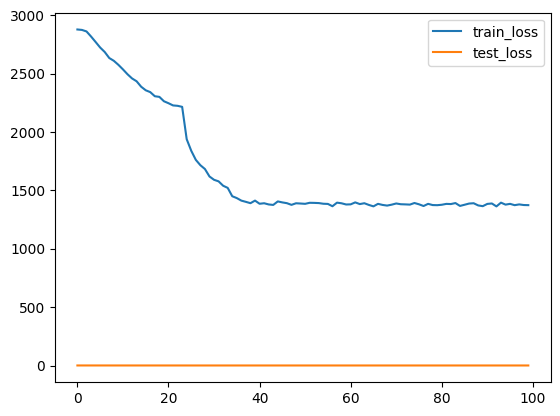

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])